Dokumentasi: 
https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb

In this example we only focus on binary classification. So we have 2 output: 1 and 0

In order to perform this classification we will be using the logistic function to perform logistic regression.

Here is an overview of what we will do throughout this lecture:

1. Basic Mathematical Overview of the Logistic Function
2. Extra Math Resources
3. DataSet Analysis
4. Data Visualization
5. Data Preparation
6. Multicollinearity Consideration
7. Logistic Regression with SciKit Learn
8. Testing and Training Data Sets
9. Conclusion and More Resources

Logistic Regression cocok untuk mengkalisifikasikan suatu data

In [1]:
#import 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm

### Step 1: Logistic Function

Text(0.5, 1.0, ' Logistic Function ')

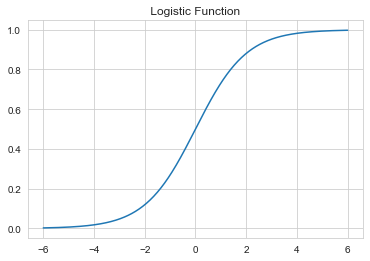

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

### Step 2: Extra Math Resources

Ada di dokumentasi

### Step 3: Dataset Analysis

The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs.

It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.

#### Dataset Description

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good
                
age             : Age

yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.
                
children        : No. children

religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
                
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
                
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
                
occupation_husb : Husband's occupation. Same as occupation.

affairs         : measure of time spent in extramarital affairs

Why a Statsmodels data set? So you can have the option of working through additional example datasets included in SciKit Learn and their own tutorials.

### Step 4: Data Visualization

In [3]:
#loading dataset in statsmodel
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Great! Let's go ahead and start our classfication by creating a new column called 'Had_Affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [5]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
    
#apply to dataframe
df['Had Affair'] = df['affairs'].apply(affair_check)

In [6]:
#see the result
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


Now let's go ahead and groupby the newly created 'Had_Affair' column. We'll do this by grouping by the column and then calling the mean aggregate function.

In [7]:
#GroupBy Had Affair column
df.groupby('Had Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


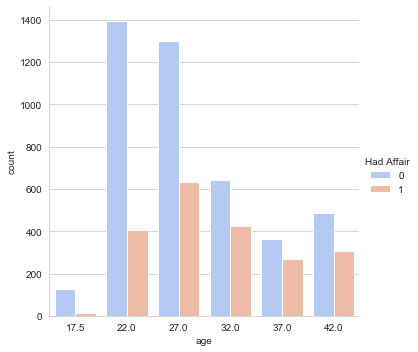

In [8]:
#Visualize the data
#Factorplot for age with Had Affair hue
sns.factorplot('age', data=df, hue='Had Affair', palette='coolwarm', kind='count')

This suggests a higher probability of an affair as age increases. Let's check the number of years married.

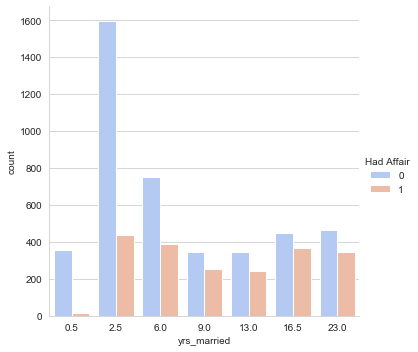

In [9]:
sns.factorplot('yrs_married', data=df, hue='Had Affair', palette='coolwarm', kind='count')

Looks like probability of having an affair increases with the number of years married. Let's check the number of children.

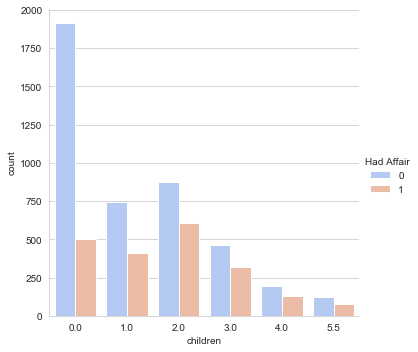

In [10]:
sns.factorplot('children', data=df, hue='Had Affair', palette='coolwarm', kind='count')

Pretty strong evidence suggesting that less children results in a lower probability of an affair (mungkin hal ini dilihat dari bar biru yang super tinggi). Finally let's check the education level.

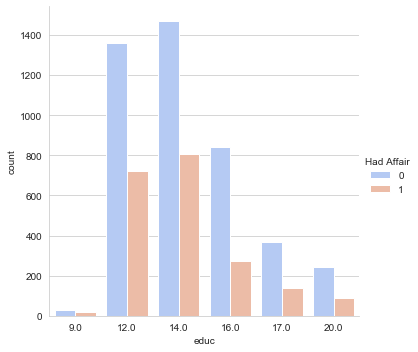

In [11]:
sns.factorplot('educ', data=df, hue='Had Affair', palette='coolwarm', kind='count')

### Step 5: Data Preparation

If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [12]:
#Create new DataFrame for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

#lihat sedikit untuk occ_dummies
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [13]:
#Memberi nama untuk tiap kolom
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

Now we will create the X and Y data sets for out logistic regression!

In [14]:
#set X as new DataFrame tanpa kolom occupation (baik biasa maupun husband) dan juga Y target
X = df.drop(['occupation', 'occupation_husb', 'Had Affair'], axis=1)

In [15]:
#concat dummies dframe
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

Concatenate all the DataFrame together

In [16]:
X = pd.concat([X, dummies], axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


Set up Y as target

In [17]:
Y = df['Had Affair']

In [18]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had Affair, dtype: int64

### Step tambahan: Logistic Regression w/o multicolinearity dan ravel

In [24]:
#create logistic regression model
log_model = LogisticRegression()

log_model.fit(X,Y)

#check accuracy
log_model.score(X,Y)

#Warning adalah untuk method fit

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9787935909519322

Memiliki akurasi sebesar 97%. Sangat akurat.

Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the null error rate.

Cek null error rate menggunakan rumus yang ada Type I dan Type II error-nya. Basic Statistics. Perlu belajar lebih lanjut.

In [25]:
#Check percentage of woman that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. Akurasi ini adalah null error rate.

Akurasinya terlihat sangat akurat dan mengalahkan null error rate cukup jauh.

Dokumentasi untuk null error rate: https://dzone.com/articles/understanding-the-confusion-matrix

In [29]:
#Cek coefficient
#Gunakan zip 
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [30]:
coeff_df

,0,1
0,rate_marriage,[-0.45156709400980144]
1,age,[-0.08287511208093344]
2,yrs_married,[0.16530663382549676]
3,children,[0.06040976719351346]
4,religious,[-0.2401027836777249]
5,educ,[0.015355969544085739]
6,affairs,[18.72017626632017]
7,occ1,[-0.20380301423212693]
8,occ2,[-0.20093314442263793]
9,occ3,[-0.07299704581722649]


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

"Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student)" - kata Tutor. 

Akan tetapi, tidak semua occupation positif (occ1-occ4 dan hocc2&hocc5) apakah hal ini karena multicolinearity? mari kita lihat 

### Part 6: Multicollinearity Consideration

Multicollineariy terjadi karena dummy variables. Misal: 
occ1 occ2 occ3 occ4 occ5 occ6 => kalau salah satu bernilai 1, yang lainnya 0 . Maka akan terlihat berkorelasi. Itu yang menyebabkan model kita distorted dan memiliki akurasi yang tinggi. Oleh karena itu, lebih baik menghapus occ1 dan hocc1 agar korelasi berjalan dengan baik. Walau kita harus mengorbankan data set point dari masing-masing kolom. [MASIH TIDAK BEGITU MENGERTI JUGA SEBENARNYA]

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [31]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1', axis=1)
X = X.drop('hocc1', axis=1)

# Drop affairs column so Y target makes sense
X = X.drop('affairs', axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called ravel. Let's use it!

In [33]:
#membuat Y menjadi array mendatar
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Step 7: Logistic Regression with Skicit Learn and Multicollinearity Consideration

In [34]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

Akurasi 73%

In [35]:
#Cek the null error rate dengan mean Y
Y.mean()

0.3224945020420987

1- 0.32 = 68%. Artinya akurais kalau kita nebak "No Affair" cuma 68%. So while we are doing better than the null error rate, we aren't doing that much better.

In [36]:
#Cek coefficient untuk melihat mana yang stronger model 
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student). 

Mengapa seperti ini? Mengapa bisa menyimpulkan bahwa Student punya likelihood Affair yang kecil? Apa karena baseline? Masih perlu dipelajari lagi

### Step 8: Testing and Training Data Sets

In [37]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#make a new log_model
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can use predict to predict classification labels for the next test set, then we will reevaluate our accuracy score!

In [39]:
#predict the class of the testing dataset
class_predict = log_model2.predict(X_test)

print(metrics.accuracy_score(Y_test, class_predict))

0.7273869346733668


Memiliki akurasi yang hampir sama seperti akurasi sebelum di-train

So what could we do to try to further improve our Logistic Regression model? We could try some regularization techniques or using a non-linear model.

Dokumentasi tentang regularization techniques: https://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning

Dokumentasi lebih lanjut: 

1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

2. https://www.datarobot.com/blog/classification-with-scikit-learn/

3. https://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html